In [2]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns  # Import Seaborn library
import matplotlib.pyplot as plt  # Import Matplotlib library
import os  # Import os module

# Hypothesis testing
# -----------------------------------
# Import Shapiro–Wilk normality test function
from scipy.stats import shapiro, ttest_ind, mannwhitneyu, levene
import scipy.stats as stats  # Import SciPy stats
import statsmodels.stats.api as sms

# Configuration
from tqdm import tqdm
# -----------------------------------
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set Pandas display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.options.display.float_format = '{:.4f}'.format  # Set float display format

In [3]:
# !pip install package1 package2
import gdown
import pandas as pd

# File ID from the Google Drive shared link
file_id = '1IkN-fylT9ZYxZJhzbgpAmJ751b6lrPy9'

# Construct the download URL
download_url = f'https://drive.google.com/uc?id={file_id}'

# Download the file
output = 'cookie_cats.csv'
gdown.download(download_url, output, quiet=False)

# Read the CSV file
raw = pd.read_csv(output)

# Display the data
print(raw.head())

Downloading...
From: https://drive.google.com/uc?id=1IkN-fylT9ZYxZJhzbgpAmJ751b6lrPy9
To: /content/cookie_cats.csv
100%|██████████| 2.80M/2.80M [00:00<00:00, 23.8MB/s]


   userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True


In [4]:
import gdown
import pandas as pd
import numpy as np
import io

def load_from_drive(file_id, file_type, info=True):
    # Construct the download URL
    download_url = f'https://drive.google.com/uc?id={file_id}'

    # Set the output filename
    output = f'downloaded_file.{file_type}'

    # Download the file
    gdown.download(download_url, output, quiet=False)

    # Read the file based on its extension
    if file_type == 'csv':
        read = pd.read_csv(output)  # Read CSV file
    elif file_type == 'xlsx':
        read = pd.read_excel(output)  # Read Excel file
    else:
        raise ValueError("Unsupported file type. Please use 'csv' or 'xlsx'.")

    # Optionally print dataset information
    if info:
        if len(read) > 0:
            print("# Data successfully imported!")
            print("# ------------------------------------", "\n")

            # Print dataset dimensions
            print("# Dimensions -------------------------")
            print("Number of observations:", read.shape[0], "Number of columns:", read.shape[1], "\n")

            # Print data type information
            print("# Data Types -----------------------------")
            if len(read.select_dtypes("object").columns) > 0:
                print("Object variables:", "\n", "Count:",
                      len(read.select_dtypes("object").columns), "\n",
                      read.select_dtypes("object").columns.tolist(), "\n")

            if len(read.select_dtypes("int64").columns) > 0:
                print("Integer variables:", "\n", "Count:",
                      len(read.select_dtypes("int64").columns), "\n",
                      read.select_dtypes("int64").columns.tolist(), "\n")

            if len(read.select_dtypes("float64").columns) > 0:
                print("Float variables:", "\n", "Count:",
                      len(read.select_dtypes("float64").columns), "\n",
                      read.select_dtypes("float64").columns.tolist(), "\n")

            if len(read.select_dtypes("bool").columns) > 0:
                print("Boolean variables:", "\n", "Count:",
                      len(read.select_dtypes("bool").columns), "\n",
                      read.select_dtypes("bool").columns.tolist(), "\n")

            # Print missing value information
            print("# Missing Values ---------------------")
            print("Any missing values? \n ", np.where(read.isnull().values.any() == False,
                                            "No missing values!", "Data contains missing values!"), "\n")

            # Print memory usage
            buf = io.StringIO()
            read.info(buf=buf)
            info = buf.getvalue().split('\n')[-2].split(":")[1].strip()
            print("# Memory Usage ---------------------- \n", info)

        else:
            print("# Data not imported!")

    return read

# Example usage
file_id = '1IkN-fylT9ZYxZJhzbgpAmJ751b6lrPy9'  # Replace with your file ID
file_type = 'csv'  # Replace with file type: 'csv' or 'xlsx'
ab = load_from_drive(file_id, file_type)
ab.head()


Downloading...
From: https://drive.google.com/uc?id=1IkN-fylT9ZYxZJhzbgpAmJ751b6lrPy9
To: /content/downloaded_file.csv
100%|██████████| 2.80M/2.80M [00:00<00:00, 21.0MB/s]


# Data successfully imported!
# ------------------------------------ 

# Dimensions -------------------------
Number of observations: 90189 Number of columns: 5 

# Data Types -----------------------------
Object variables: 
 Count: 1 
 ['version'] 

Integer variables: 
 Count: 2 
 ['userid', 'sum_gamerounds'] 

Boolean variables: 
 Count: 2 
 ['retention_1', 'retention_7'] 

# Missing Values ---------------------
Any missing values? 
  No missing values! 

# Memory Usage ---------------------- 
 2.2+ MB


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [5]:
# Number of unique player
ab["userid"].nunique()

90189

In [6]:
# Counting the number of players in each A/B group.
ab.groupby(["version"])[["userid"]].nunique()

,userid
version,
gate_30,44700
gate_40,45489


In [7]:
ab['version'].value_counts()

,count
version,
gate_40,45489
gate_30,44700


In [8]:
# Check the number of unique users
print(ab.userid.nunique() == ab.shape[0])  # Print whether each user ID is unique

# Summary statistics: sum_gamerounds
ab.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["sum_gamerounds"]].T  # Print summary statistics for sum_gamerounds

True


,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
sum_gamerounds,90189.0000,51.8725,195.0509,0.0000,0.0000,1.0000,1.0000,3.0000,16.0000,67.0000,134.0000,221.0000,493.0000,49854.0000


In [9]:
# Summary statistics for A/B groups and the target variable
ab.groupby("version").sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
version,,,,,
gate_30,44700,17.0000,52.4563,256.7164,49854
gate_40,45489,16.0000,51.2988,103.2944,2640


In [16]:
# Change the Font to Chinese because there is Chinese Font in matplotlib

!wget -q -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

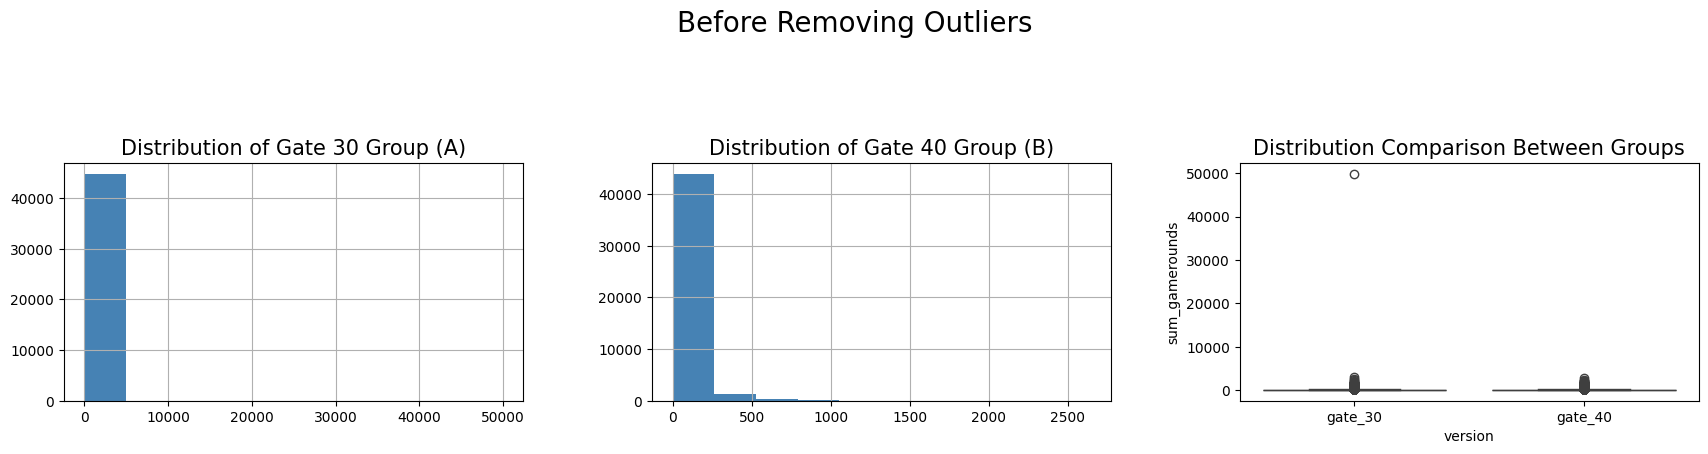

In [10]:
# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot the game rounds distribution histogram for the Gate 30 group
ab[(ab.version == "gate_30")].hist("sum_gamerounds", ax=axes[0], color="steelblue")

# Plot the game rounds distribution histogram for the Gate 40 group
ab[(ab.version == "gate_40")].hist("sum_gamerounds", ax=axes[1], color="steelblue")

# Plot a boxplot comparing the game rounds distribution between the two groups
sns.boxplot(x=ab.version, y=ab.sum_gamerounds, ax=axes[2])

# Set the main title and subplot titles
plt.suptitle("Before Removing Outliers", fontsize=20)
axes[0].set_title("Distribution of Gate 30 Group (A)", fontsize=15)
axes[1].set_title("Distribution of Gate 40 Group (B)", fontsize=15)
axes[2].set_title("Distribution Comparison Between Groups", fontsize=15)

# Adjust layout spacing
plt.tight_layout(pad=4)

In [11]:
# Calculating 1-day and 7-days retention for each A/B group
df_retention_ab = ab.groupby("version").agg({"userid":"count", "retention_1":"mean","retention_7":"mean", "sum_gamerounds":"sum"})
df_retention_ab

,userid,retention_1,retention_7,sum_gamerounds
version,,,,
gate_30,44700,0.4482,0.1902,2344795
gate_40,45489,0.4423,0.1820,2333530


Text(0.5, 1.0, 'Before Removing the Extreme Value')

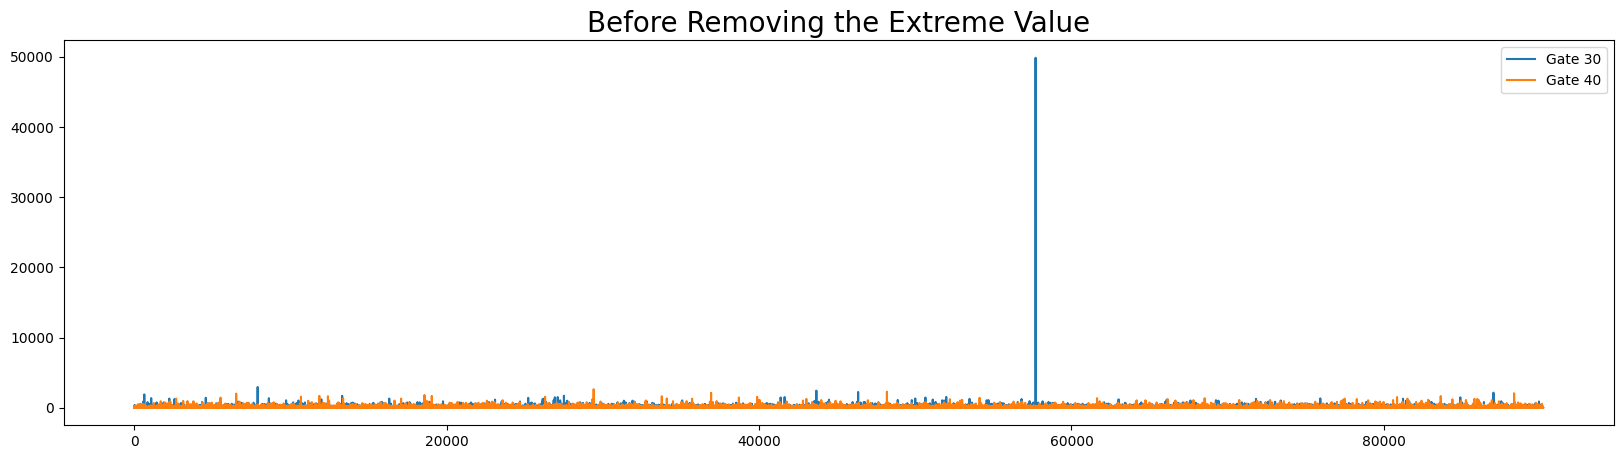

In [12]:
# Select data where the version is "gate_30" or "gate_40" and plot the game rounds as line charts
ab[ab.version == "gate_30"].sum_gamerounds.plot(legend=True, label="Gate 30", figsize=(20, 5))
ab[ab.version == "gate_40"].sum_gamerounds.plot(legend=True, label="Gate 40")

# Set the title of the plot
plt.title("Before Removing the Extreme Value", fontsize=20)

In [13]:
# Keep rows where the number of game rounds is less than the maximum number of game rounds
ab = ab[ab.sum_gamerounds < ab.sum_gamerounds.max()]

# Compute summary statistics for the number of game rounds
# Select specific percentiles for summarization and transpose the result for better readability
ab.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["sum_gamerounds"]].T

,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
sum_gamerounds,90188.0000,51.3203,102.6827,0.0000,0.0000,1.0000,1.0000,3.0000,16.0000,67.0000,134.0000,221.0000,493.0000,2961.0000


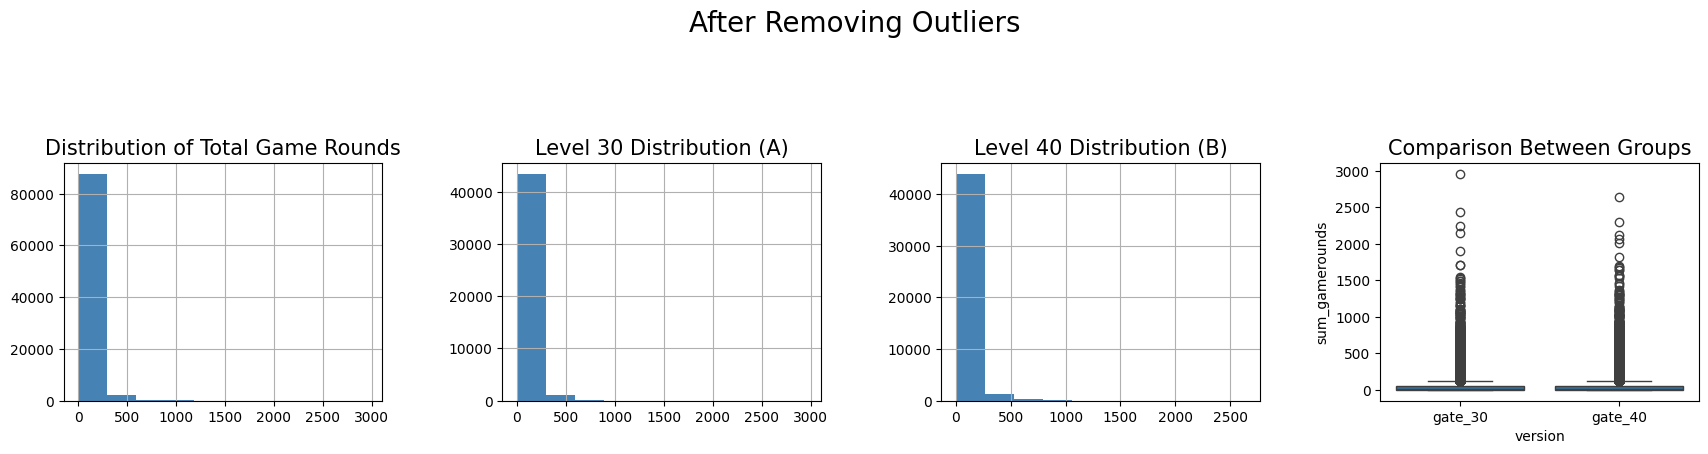

In [14]:
# Create a figure with 1 row and 4 columns of subplots, and set the figure size to (18, 5)
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

# Plot a histogram of total game rounds and place it on the first subplot
ab.sum_gamerounds.hist(ax=axes[0], color="steelblue")

# Plot a histogram of game rounds for version "gate_30" and place it on the second subplot
ab[(ab.version == "gate_30")].hist("sum_gamerounds", ax=axes[1], color="steelblue")

# Plot a histogram of game rounds for version "gate_40" and place it on the third subplot
ab[(ab.version == "gate_40")].hist("sum_gamerounds", ax=axes[2], color="steelblue")

# Plot boxplots of game rounds for versions "gate_30" and "gate_40", and place them on the fourth subplot
sns.boxplot(x=ab.version, y=ab.sum_gamerounds, ax=axes[3])

# Set the overall title
plt.suptitle("After Removing Outliers", fontsize=20)

# Set titles for each subplot
axes[0].set_title("Distribution of Total Game Rounds", fontsize=15)
axes[1].set_title("Level 30 Distribution (A)", fontsize=15)
axes[2].set_title("Level 40 Distribution (B)", fontsize=15)
axes[3].set_title("Comparison Between Groups", fontsize=15)

# Adjust spacing between subplots
plt.tight_layout(pad=4)

Text(0.5, 0.98, 'After Removing Outliers')

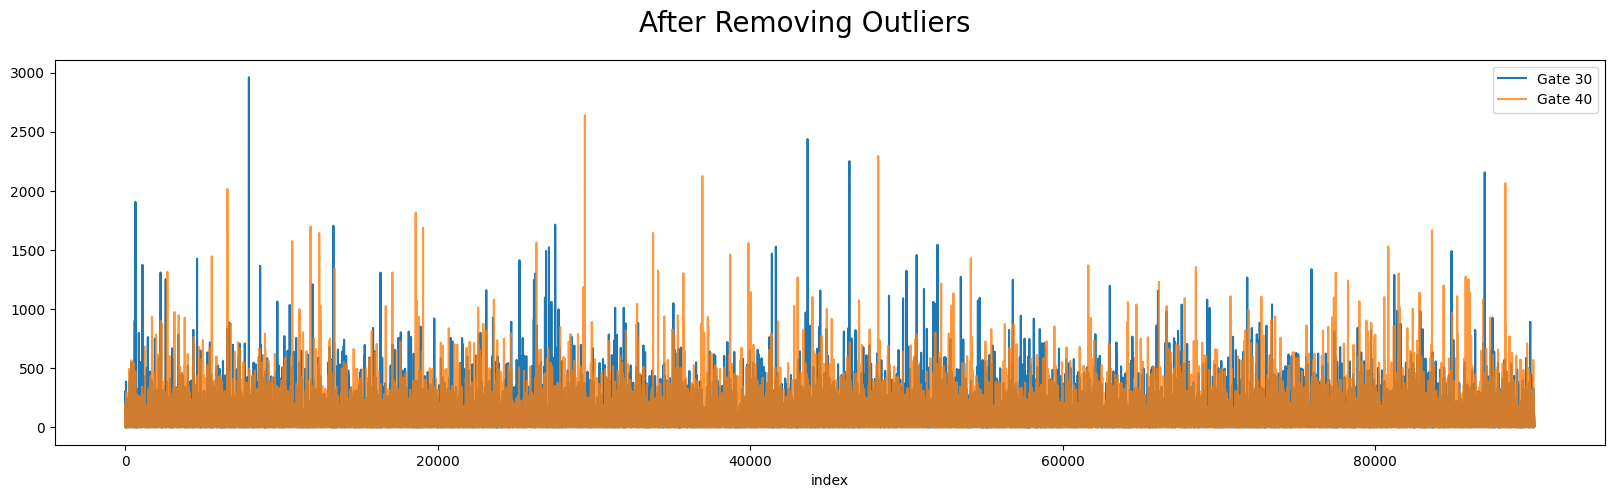

In [15]:
# Plot a line chart of game rounds for version "gate_30", reset the index and set the "index" column as the new index,
# set the legend and label to "Gate 30", and specify the figure size as (20, 5)
ab[(ab.version == "gate_30")].reset_index().set_index("index").sum_gamerounds.plot(legend=True, label="Gate 30", figsize=(20, 5))

# Plot a line chart of game rounds for version "gate_40", reset the index and set the "index" column as the new index,
# set the legend and label to "Gate 40", and set the transparency (alpha) to 0.8
ab[ab.version == "gate_40"].reset_index().set_index("index").sum_gamerounds.plot(legend=True, label="Gate 40", alpha=0.8)

# Set the overall title
plt.suptitle("After Removing Outliers", fontsize=20)

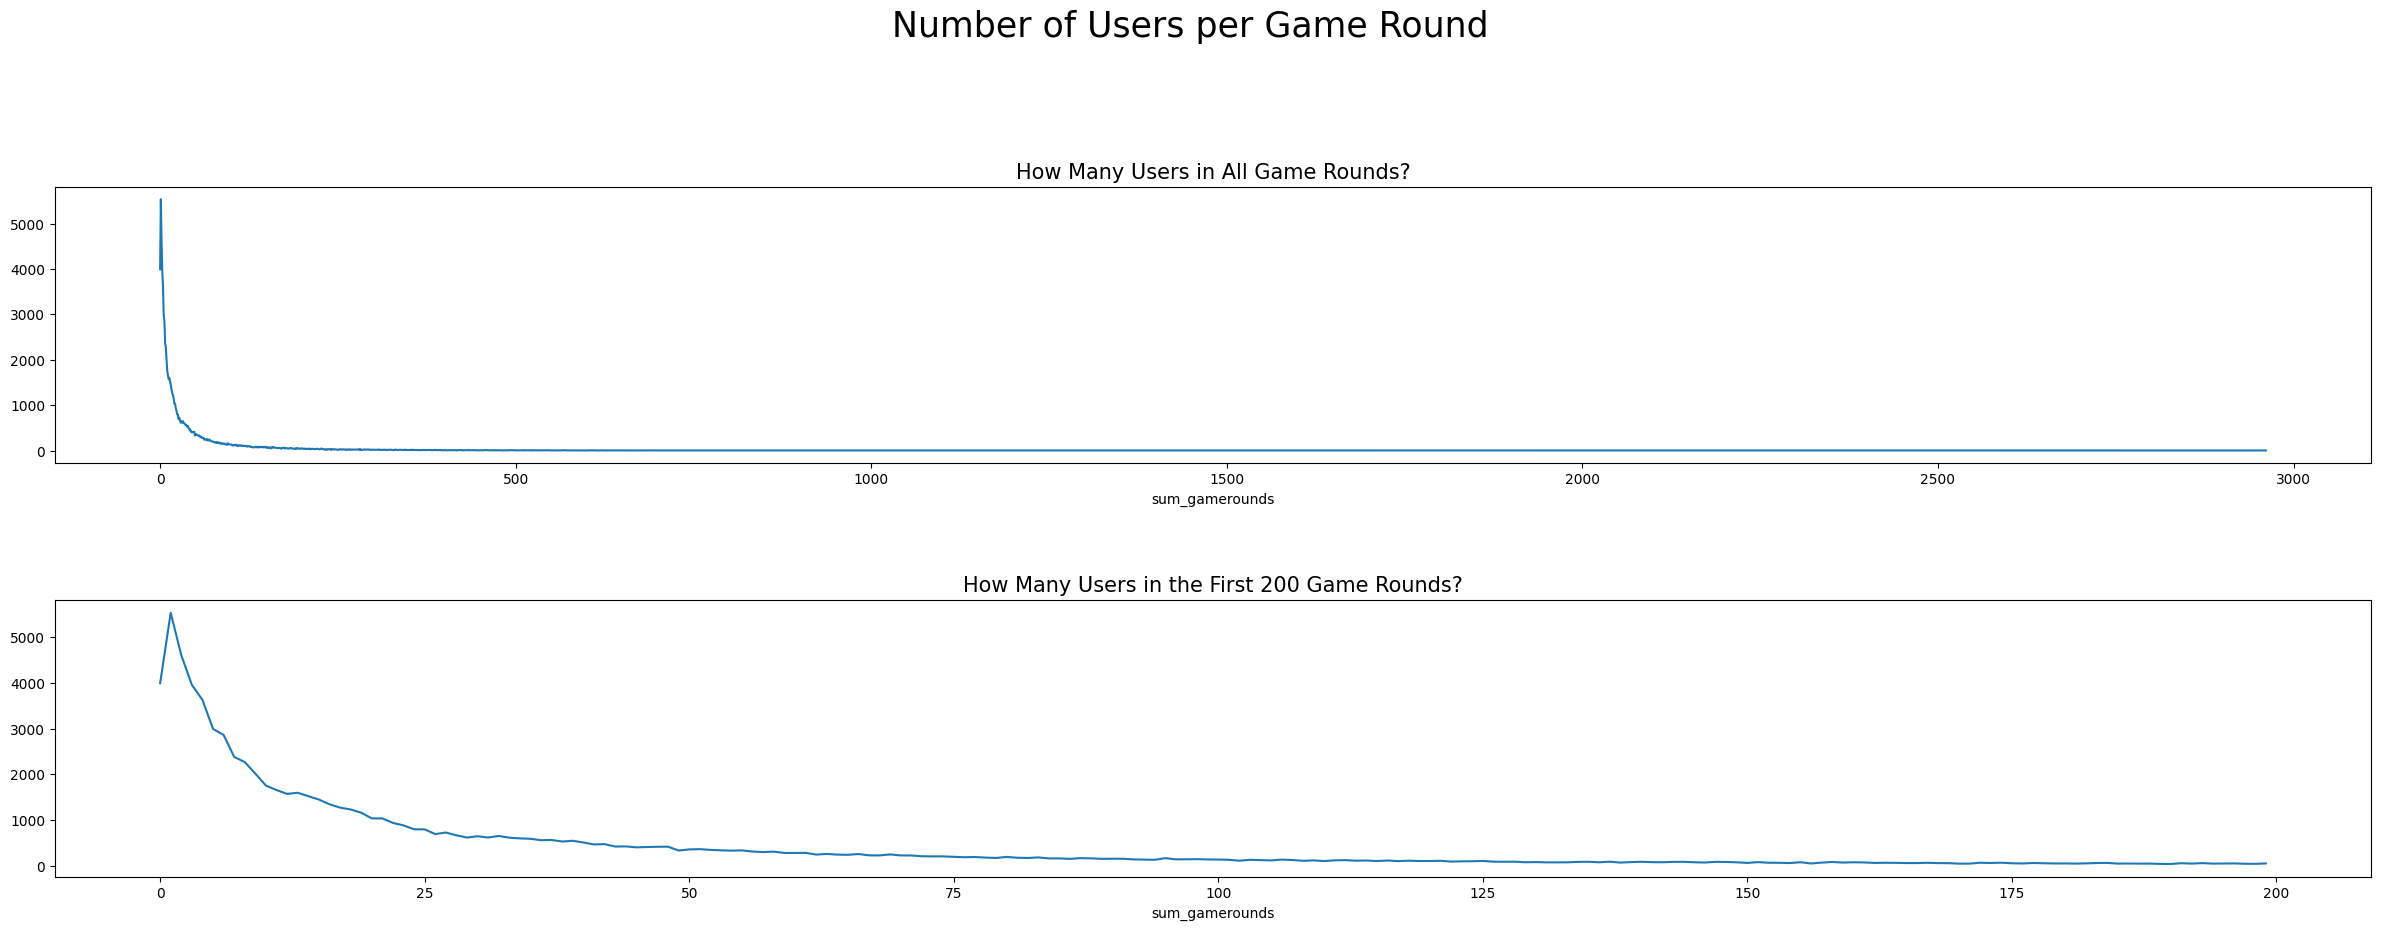

In [16]:
# Create a figure with 2 rows and 1 column of subplots, and set the figure size to (25, 10)
fig, axes = plt.subplots(2, 1, figsize=(25, 10))

# Group by the number of game rounds, count the number of users for each game round,
# and plot a line chart on the first subplot
ab.groupby("sum_gamerounds").userid.count().plot(ax=axes[0])

# Group by the number of game rounds, count the number of users for the first 200 game rounds,
# and plot a line chart on the second subplot
ab.groupby("sum_gamerounds").userid.count()[:200].plot(ax=axes[1])

# Set the overall title
plt.suptitle("Number of Users per Game Round", fontsize=25)

# Set titles for each subplot
axes[0].set_title("How Many Users in All Game Rounds?", fontsize=15)
axes[1].set_title("How Many Users in the First 200 Game Rounds?", fontsize=15)

# Adjust spacing between subplots
plt.tight_layout(pad=5)

In [17]:
# The number of users corresponding to the top 20 game rounds.
ab.groupby("sum_gamerounds")['userid'].count().reset_index(name='user_cnt').sort_values('user_cnt', ascending=False)[:20]



,sum_gamerounds,user_cnt
1,1,5538
2,2,4606
0,0,3994
3,3,3958
4,4,3629
5,5,2992
6,6,2861
7,7,2379
8,8,2267
9,9,2013


In [18]:
# Get the number of users who reached level 30 and level 40
ab.groupby("sum_gamerounds").userid.count().loc[[30, 40]]

,userid
sum_gamerounds,
30,642
40,505


In [19]:
# Summary statistics of A/B groups and target variable
ab.groupby("version").sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
version,,,,,
gate_30,44699,17.0000,51.3421,102.0576,2961
gate_40,45489,16.0000,51.2988,103.2944,2640


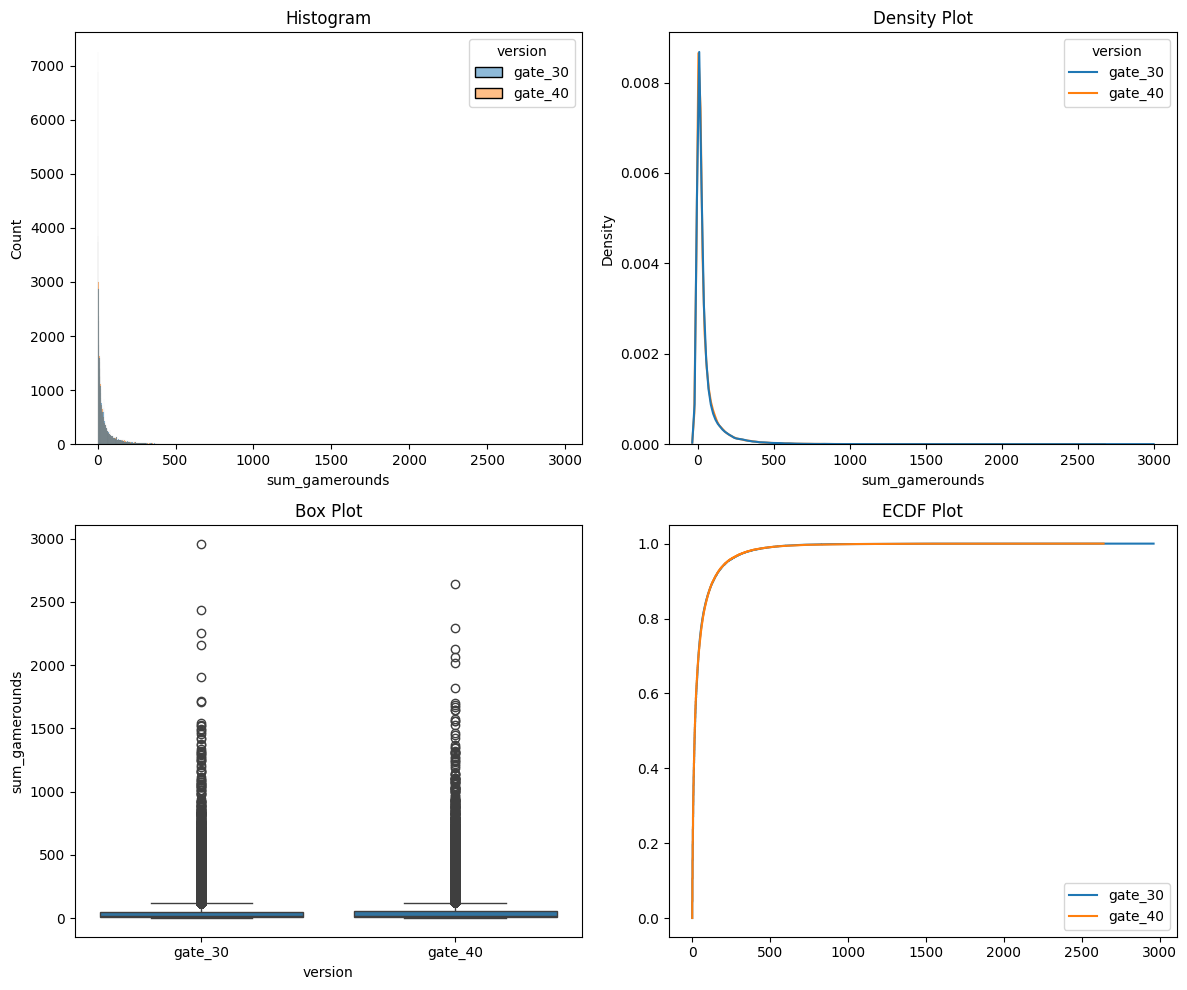

In [20]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Histogram
sns.histplot(data=ab, x='sum_gamerounds', hue='version', kde=False, ax=axs[0, 0])
axs[0, 0].set_title('Histogram')

# Density Plot
sns.kdeplot(data=ab, x='sum_gamerounds', hue='version', ax=axs[0, 1])
axs[0, 1].set_title('Density Plot')

# Box Plot
sns.boxplot(data=ab, x='version', y='sum_gamerounds', ax=axs[1, 0])
axs[1, 0].set_title('Box Plot')

# ECDF Plot
def ecdf(data):
    x = sorted(data)
    y = [i / len(x) for i in range(1, len(x) + 1)]
    return x, y

version_1_data = ab[ab['version'] == 'gate_30']['sum_gamerounds']
version_2_data = ab[ab['version'] == 'gate_40']['sum_gamerounds']

x_v1, y_v1 = ecdf(version_1_data)
x_v2, y_v2 = ecdf(version_2_data)

axs[1, 1].plot(x_v1, y_v1, label='gate_30')
axs[1, 1].plot(x_v2, y_v2, label='gate_40')
axs[1, 1].set_title('ECDF Plot')
axs[1, 1].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [21]:
# Create a DataFrame containing retention statistics
pd.DataFrame({
    "RET1_COUNT": ab["retention_1"].value_counts(),  # Count of users retained after 1 day
    "RET1_RATIO": ab["retention_1"].value_counts() / len(ab),  # Proportion of users retained after 1 day
    "RET7_COUNT": ab["retention_7"].value_counts(),  # Count of users retained after 7 days
    "RET7_RATIO": ab["retention_7"].value_counts() / len(ab)   # Proportion of users retained after 7 days
})

,RET1_COUNT,RET1_RATIO,RET7_COUNT,RET7_RATIO
False,50035,0.5548,73408,0.8139
True,40153,0.4452,16780,0.1861


In [22]:
# Summary statistics of game rounds grouped by version and 1-day retention status
ab.groupby(["version", "retention_1"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

count  median    mean      std   max
version retention_1                                      
gate_30 False        24665  6.0000 16.3591  36.5284  1072
        True         20034 48.0000 94.4117 135.0377  2961
gate_40 False        25370  6.0000 16.3404  35.9258  1241
        True         20119 49.0000 95.3812 137.8873  2640

In [23]:
# Summary statistics of game rounds grouped by version and 7-day retention status
ab.groupby(["version", "retention_7"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

count   median     mean      std   max
version retention_7                                        
gate_30 False        36198  11.0000  25.7965  43.3162   981
        True          8501 105.0000 160.1175 179.3586  2961
gate_40 False        37210  11.0000  25.8564  44.4061  2640
        True          8279 111.0000 165.6498 183.7925  2294

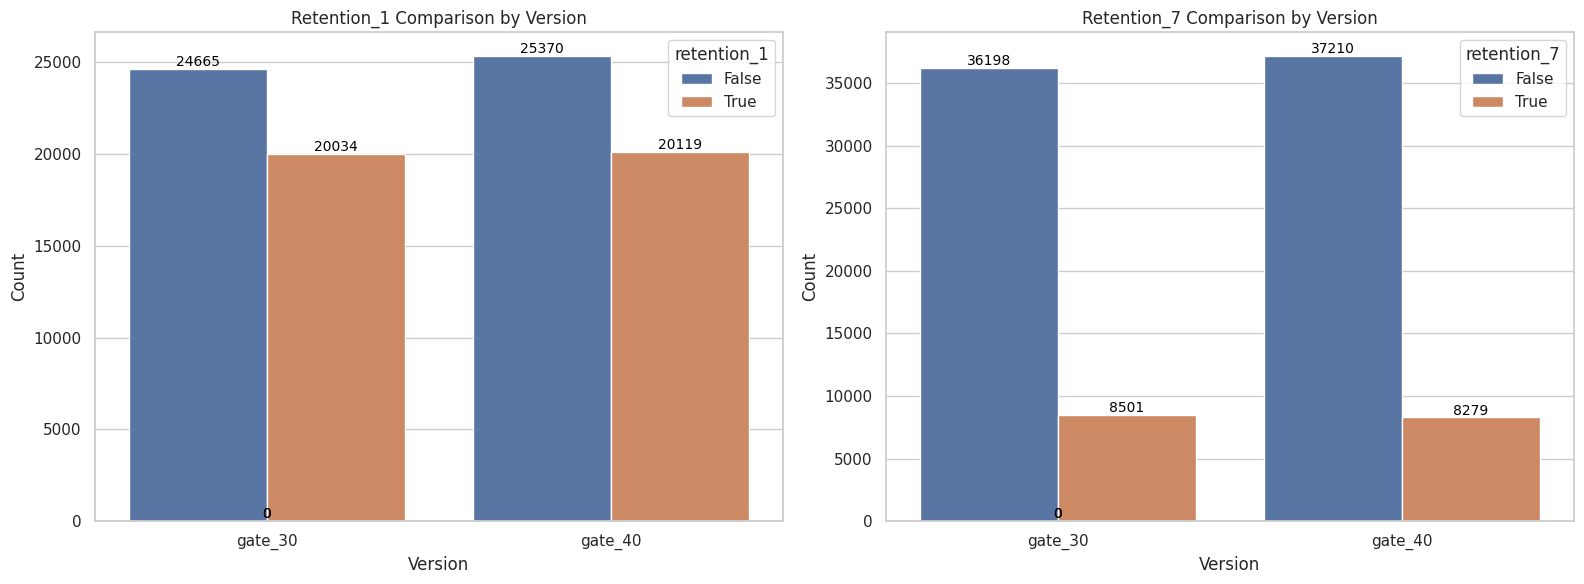

In [24]:
# Use groupby to calculate summary statistics for different versions and 1-day retention status
stats1 = ab.groupby(["version", "retention_1"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"]).reset_index()

# Plot stacked bar charts using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))

# First subplot: Retention_1 Comparison by Version
plt.subplot(1, 2, 1)
ax1 = sns.barplot(data=stats1, x='version', y='count', hue='retention_1')
plt.title('Retention_1 Comparison by Version')
plt.xlabel('Version')
plt.ylabel('Count')

# Annotate bar values
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

# Use groupby to calculate summary statistics for different versions and 7-day retention status
stats7 = ab.groupby(["version", "retention_7"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"]).reset_index()

# Second subplot: Retention_7 Comparison by Version
plt.subplot(1, 2, 2)
ax2 = sns.barplot(data=stats7, x='version', y='count', hue='retention_7')
plt.title('Retention_7 Comparison by Version')
plt.xlabel('Version')
plt.ylabel('Count')

# Annotate bar values
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


In [25]:
ab["Retention"] = np.where((ab.retention_1 == True) & (ab.retention_7 == True), 1,0)
ab.groupby(["version", "Retention"])["sum_gamerounds"].agg(["count", "median", "mean", "std", "max"])

count   median     mean      std   max
version Retention                                        
gate_30 0          38023  12.0000  28.0703  48.0175  1072
        1           6676 127.0000 183.8863 189.6264  2961
gate_40 0          38983  12.0000  28.1034  48.9278  2640
        1           6506 133.0000 190.2824 194.2201  2294

In [26]:
ab["NewRetention"] = list(map(lambda x,y: str(x)+"-"+str(y), ab.retention_1, ab.retention_7))
ab.groupby(["NewRetention","version"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"]).reset_index()

,NewRetention,version,count,median,mean,std,max
0,False-False,gate_30,22840,6.0000,11.8197,21.6426,981
1,False-False,gate_40,23597,6.0000,11.9133,20.9010,547
2,False-True,gate_30,1825,43.0000,73.1693,93.2223,1072
3,False-True,gate_40,1773,47.0000,75.2611,94.4780,1241
4,True-False,gate_30,13358,33.0000,49.6945,58.1254,918
5,True-False,gate_40,13613,32.0000,50.0255,60.9246,2640
6,True-True,gate_30,6676,127.0000,183.8863,189.6264,2961
7,True-True,gate_40,6506,133.0000,190.2824,194.2201,2294


In [27]:
# Redefine A/B groups
# If the value in the "version" column is "gate_30", replace it with "A"; otherwise, replace it with "B"
ab["version"] = np.where(ab.version == "gate_30", "A", "B")

# Display the first few rows of the modified DataFrame to verify the result
ab.head()

,userid,version,sum_gamerounds,retention_1,retention_7,Retention,NewRetention
0,116,A,3,False,False,0,False-False
1,337,A,38,True,False,0,True-False
2,377,B,165,True,False,0,True-False
3,483,B,1,False,False,0,False-False
4,488,B,179,True,True,1,True-True


In [28]:
# ab = ab[ab['sum_gamerounds']<=300]
# ab['sum_gamerounds'].quantile(0.01,0.99)

# A/B Test Hypotheses
H0: A == B
H1: A != B 

Normality satisfied?
Group A: False, Group B: False

Homogeneity of variances satisfied: True 



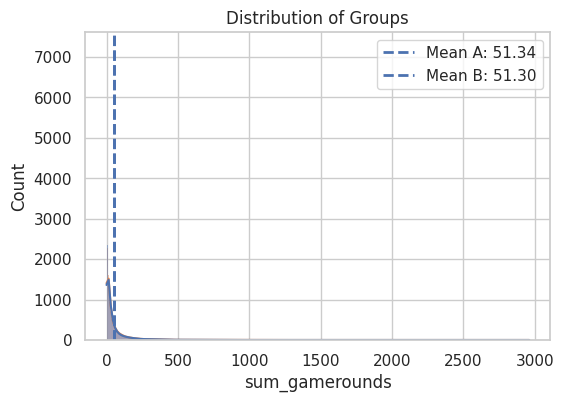

,Test Type,target,Homogeneity,AB Hypothesis,p-value,Mean Difference,Effect Size,Observed Power,Comment,t-stats
0,Non-Parametric,sum_gamerounds,Yes,Fail to Reject H0,0.0509,-0.0433,-0.0004,0.0505,No significant difference between A/B!,1024285761.5000


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, ttest_ind, mannwhitneyu, levene
import statsmodels.stats.api as sms

def AB_Test(dataframe, group, target, alpha=0.05, visualize=True):
    '''
    A/B testing helper:
    - Chooses a parametric or non-parametric test based on normality and variance checks
    - Returns test summary, effect size, and observed power
    '''
    # Split A/B groups
    groupA = dataframe[dataframe[group] == "A"][target]
    groupB = dataframe[dataframe[group] == "B"][target]

    # Normality tests
    ntA = shapiro(groupA)[1] < alpha
    ntB = shapiro(groupB)[1] < alpha

    # Homogeneity of variances test
    leveneTest = levene(groupA, groupB)[1] < alpha

    if (ntA == False) & (ntB == False):  # Normally distributed
        # Equal/unequal variances branch
        if leveneTest == False:
            ttest, p_value = ttest_ind(groupA, groupB, equal_var=True)
            test_type = "Parametric (Equal Variance)"
        else:
            ttest, p_value = ttest_ind(groupA, groupB, equal_var=False)
            test_type = "Parametric (Unequal Variance)"
    else:
        # Non-parametric test
        ttest, p_value = mannwhitneyu(groupA, groupB, alternative='two-sided')
        test_type = "Non-Parametric"

    # Mean difference
    mean_diff = groupB.mean() - groupA.mean()

    # Effect size (Cohen's d using pooled SD)
    nobs_A = len(groupA)
    nobs_B = len(groupB)
    pooled_std = np.sqrt(((nobs_A-1)*groupA.var() + (nobs_B-1)*groupB.var()) / (nobs_A + nobs_B - 2))
    effect_size = mean_diff / pooled_std

    # Observed power
    observed_power = sms.tt_ind_solve_power(effect_size=effect_size, nobs1=nobs_A, alpha=alpha, alternative='two-sided')

    # Results
    ab_hypothesis = p_value < alpha
    comment = "No significant difference between A/B!" if not ab_hypothesis else "Significant difference between A/B!"

    result = pd.DataFrame({
        "Test Type": [test_type],
        "target": [target],
        "Homogeneity": ["Yes" if not leveneTest else "No"],
        "AB Hypothesis": ["Reject H0" if ab_hypothesis else "Fail to Reject H0"],
        "p-value": [p_value],
        "Mean Difference": [mean_diff],
        "Effect Size": [effect_size],
        "Observed Power": [observed_power],
        "Comment": [comment],
        "t-stats": [ttest]
    })

    # Print hypotheses
    print("# A/B Test Hypotheses")
    print("H0: A == B")
    print("H1: A != B", "\n")

    # Print assumption checks
    print(f"Normality satisfied?\nGroup A: {not ntA}, Group B: {not ntB}\n")
    print(f"Homogeneity of variances satisfied: {not leveneTest}", "\n")

    # Visualization
    if visualize:
        plt.figure(figsize=(6, 4))
        sns.histplot(data=dataframe, x=target, hue=group, kde=True)
        plt.axvline(groupA.mean(), linestyle='dashed', linewidth=2, label=f'Mean A: {groupA.mean():.2f}')
        plt.axvline(groupB.mean(), linestyle='dashed', linewidth=2, label=f'Mean B: {groupB.mean():.2f}')
        plt.title('Distribution of Groups')
        plt.legend()
        plt.show()

    return result

# Apply A/B test
result = AB_Test(dataframe=ab, group="version", target="sum_gamerounds")

result


In [30]:
df = ab.copy()

In [31]:
df

,userid,version,sum_gamerounds,retention_1,retention_7,Retention,NewRetention
0,116,A,3,False,False,0,False-False
1,337,A,38,True,False,0,True-False
2,377,B,165,True,False,0,True-False
3,483,B,1,False,False,0,False-False
4,488,B,179,True,True,1,True-True
...,...,...,...,...,...,...,...
90184,9999441,B,97,True,False,0,True-False
90185,9999479,B,30,False,False,0,False-False
90186,9999710,A,28,True,False,0,True-False
90187,9999768,B,51,True,False,0,True-False


In [32]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('abtest.db')

# Store the DataFrame into the SQLite database
df.to_sql('abtest', conn, if_exists='replace', index=False)

# Query data from the SQLite database
query = 'SELECT * FROM abtest'
df_from_db = pd.read_sql(query, conn)

df_from_db

,userid,version,sum_gamerounds,retention_1,retention_7,Retention,NewRetention
0,116,A,3,0,0,0,False-False
1,337,A,38,1,0,0,True-False
2,377,B,165,1,0,0,True-False
3,483,B,1,0,0,0,False-False
4,488,B,179,1,1,1,True-True
...,...,...,...,...,...,...,...
90183,9999441,B,97,1,0,0,True-False
90184,9999479,B,30,0,0,0,False-False
90185,9999710,A,28,1,0,0,True-False
90186,9999768,B,51,1,0,0,True-False


In [33]:
query = '''


SELECT
    label,
    version,
    SUM(cnt) as cnts,
    SUM(is_retent) as retent_cnts
FROM (
    SELECT
        'retention_1' as label,
        version,
        userid,
        1 as cnt,
        retention_1 as is_retent
    FROM abtest

    UNION ALL

    SELECT
        'retention_7' as label,
        version,
        userid,
        1 as cnt,
        retention_7 as is_retent
    FROM abtest
) AS subquery
GROUP BY label, version;



'''

rent_res = pd.read_sql(query, conn)
rent_res

,label,version,cnts,retent_cnts
0,retention_1,A,44699,20034
1,retention_1,B,45489,20119
2,retention_7,A,44699,8501
3,retention_7,B,45489,8279


In [34]:
# Calculate retention rates for control group (A) and experiment group (B)
retention_1_A = df[df['version'] == 'A']['retention_1'].mean()
retention_1_B = df[df['version'] == 'B']['retention_1'].mean()

retention_7_A = df[df['version'] == 'A']['retention_7'].mean()
retention_7_B = df[df['version'] == 'B']['retention_7'].mean()

# Calculate the difference (Delta) in retention rates
delta_1 = retention_1_B - retention_1_A
delta_7 = retention_7_B - retention_7_A

# Compute p1, p2, and pooled p values
n_A = df[df['version'] == 'A'].shape[0]
n_B = df[df['version'] == 'B'].shape[0]

retention_1_p1 = retention_1_A
retention_1_p2 = retention_1_B
retention_1_p = (retention_1_p1 * n_A + retention_1_p2 * n_B) / (n_A + n_B)

retention_7_p1 = retention_7_A
retention_7_p2 = retention_7_B
retention_7_p = (retention_7_p1 * n_A + retention_7_p2 * n_B) / (n_A + n_B)

# Compute standard errors
se_1 = np.sqrt((retention_1_p * (1 - retention_1_p) / n_A) + (retention_1_p * (1 - retention_1_p) / n_B))
se_7 = np.sqrt((retention_7_p * (1 - retention_7_p) / n_A) + (retention_7_p * (1 - retention_7_p) / n_B))

# Compute z-scores
z_1 = delta_1 / se_1
z_7 = delta_7 / se_7

# Compute p-values (two-tailed test)
p_1 = stats.norm.sf(abs(z_1)) * 2
p_7 = stats.norm.sf(abs(z_7)) * 2

print(f"Retention 1-day: Delta = {delta_1}, SE = {se_1}, z = {z_1}, p = {p_1}")
print(f"Retention 7-day: Delta = {delta_7}, SE = {se_7}, z = {z_7}, p = {p_7}")

# Check significance
alpha = 0.05
if p_1 < alpha:
    print("Retention 1-day difference is significant.")
else:
    print("Retention 1-day difference is not significant.")

if p_7 < alpha:
    print("Retention 7-day difference is significant.")
else:
    print("Retention 7-day difference is not significant.")


Retention 1-day: Delta = -0.005915196587034155, SE = 0.0033099350735518005, z = -1.787103509763628, p = 0.0739207603418346
Retention 7-day: Delta = -0.00818318160884296, SE = 0.0025917386041911824, z = -3.1574100858819936, p = 0.0015917731773993442
Retention 1-day difference is not significant.
Retention 7-day difference is significant.


Sample data: First, we have an original sample—typically the observed data, e.g., the retention rates of the two groups in the Cookie Cats game.
Resampling: Create many bootstrap samples by repeatedly drawing randomly from the original sample (with replacement). Each resample has the same size as the original but will vary due to randomness.
Infer statistics: For each resample, compute the statistic of interest, such as the difference in retention rates (Delta) or any other metric needed.
Assess inference quality: By examining the distribution of the statistic across resamples, evaluate the quality of our inference about the sample. This lets us quantify how accurate or credible our inference about the sample statistic is.
Advantage: It requires no assumptions about the population distribution; it directly uses the sample to infer properties of the statistic.

Concrete steps

Create 500 bootstrap samples:
Use the bootstrap method to generate 500 resampled datasets from the original data. Each resample should contain the same number of observations as the original dataset.

Compute 1-day and 7-day retention for A/B groups:
For each resample, after moving the first gate to level 30 vs. level 40, compute 1-day and 7-day retention for groups A and B.

Plot bootstrap distributions:
For each retention metric (1-day and 7-day), plot the bootstrap distributions for groups A and B to visualize how retention varies under the different gate settings.

Compute A/B retention differences:
After moving the gate, calculate the retention-rate difference between A and B. This can be done by comparing the mean or median across the two groups’ bootstrap resamples.

Estimate the probability that retention is higher at level 30:
Determine, for both 1-day and 7-day retention, the probability that the level-30 setting yields higher retention than the level-40 setting. This can be computed from the bootstrap distribution (e.g., the share of resamples where Δ>0).

Evaluate results and make a recommendation:
Based on the analysis and the estimated probabilities, evaluate the effect of moving the first gate and provide a decision recommendation—e.g., keep the new setting or roll back to the old one.

In [35]:
iterations = 500

bootstrap_df = pd.DataFrame()
p_values = []

df = ab.copy()

# Run 500 bootstrap iterations
for x in tqdm(range(iterations)):
    # Create a resampled dataset and calculate mean retention for each version (A/B)
    iter_df = df.sample(frac=1, replace=True).groupby(['version'], as_index=False).agg(
        retention_1=('retention_1', np.mean),
        retention_7=('retention_7', np.mean)
    )

    # Separate control (A) and variant (B) data
    control_iter_df = iter_df[iter_df['version'] == 'A'].reset_index()
    variant_iter_df = iter_df[iter_df['version'] == 'B'].reset_index()

    # Combine results from each iteration into one DataFrame
    bootstrap_df = pd.concat([bootstrap_df, iter_df])


100%|██████████| 500/500 [00:14<00:00, 34.73it/s]


In [36]:
# bootstrapped data frame
bootstrap_df.head()

,version,retention_1,retention_7
0,A,0.4470,0.1902
1,B,0.4442,0.1814
0,A,0.4483,0.1911
1,B,0.4404,0.1838
0,A,0.4495,0.1886


In [37]:
# transpose data frame
bootstrap_df_melt = pd.melt(bootstrap_df, id_vars = 'version', value_vars = ['retention_1', 'retention_7'], var_name = 'ratio_metric')
bootstrap_df_melt.head()

,version,ratio_metric,value
0,A,retention_1,0.4470
1,B,retention_1,0.4442
2,A,retention_1,0.4483
3,B,retention_1,0.4404
4,A,retention_1,0.4495


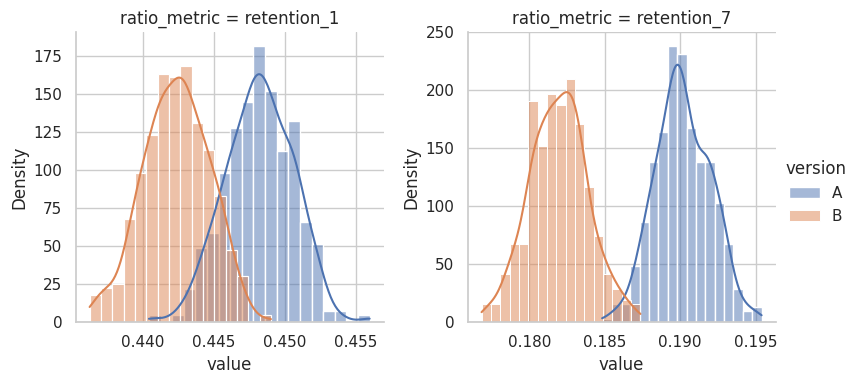

In [38]:
# plot bootstrap distributions
plot = sns.FacetGrid(bootstrap_df_melt, col="ratio_metric", sharex = False, sharey = False, height = 4, hue = 'version')
plot.map_dataframe(sns.histplot, x="value", kde = True, stat = 'density', common_bins = True, fill = True)
plot.add_legend()

In [39]:
bootstrap_control = bootstrap_df[bootstrap_df['version'] == 'A'].reset_index()
bootstrap_variant = bootstrap_df[bootstrap_df['version'] == 'B'].reset_index()

In [40]:
# calculate KPIs differences
bootstrap_diffs = pd.DataFrame()

bootstrap_diffs['retention_1_diff'] = bootstrap_variant['retention_1'] - bootstrap_control['retention_1']
bootstrap_diffs['retention_7_diff'] = bootstrap_variant['retention_7'] - bootstrap_control['retention_7']

In [41]:
bootstrap_diffs_melt = pd.melt(bootstrap_diffs, value_vars = ['retention_1_diff', 'retention_7_diff'], var_name = 'ratio_metric')

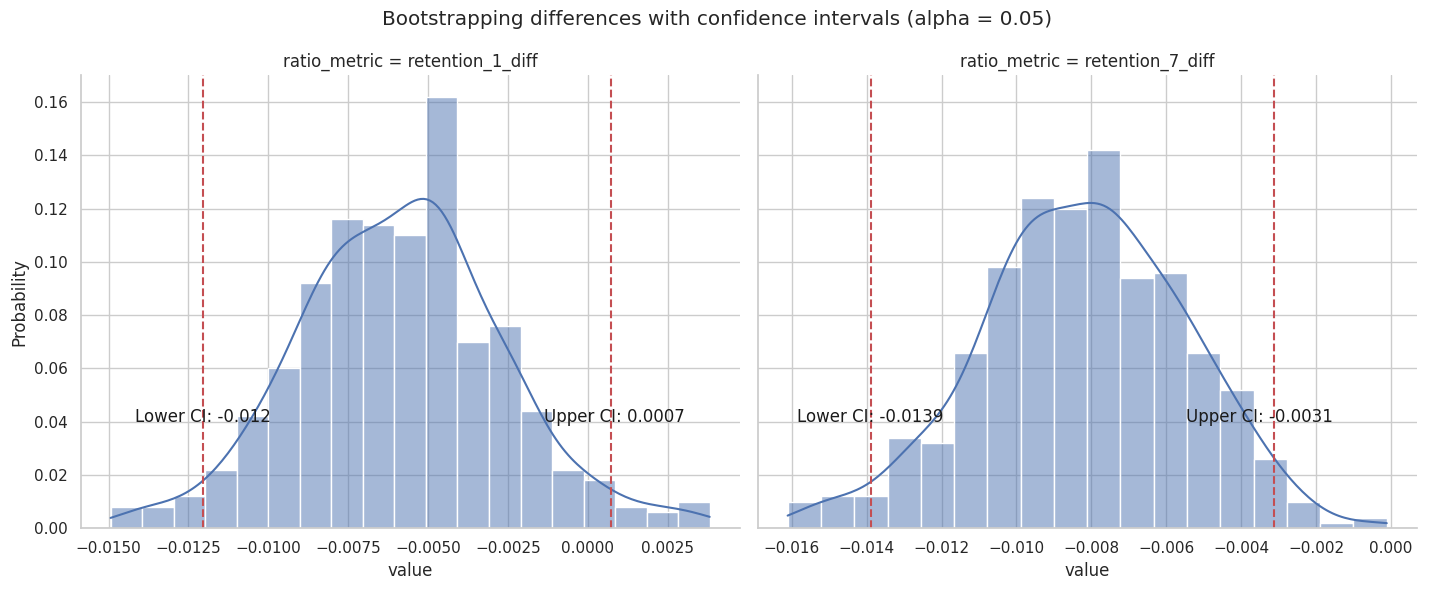

In [42]:
# Define alpha for confidence intervals
alpha = 0.05
lower_ci = alpha / 2
upper_ci = 1 - (alpha / 2)

# Create a FacetGrid with seaborn
plot = sns.FacetGrid(bootstrap_diffs_melt, col="ratio_metric", sharex=False, height=6, aspect=1.2)
plot.map_dataframe(sns.histplot, x="value", kde=True, stat='probability', common_bins=True, fill=True)
plot.fig.suptitle(f'Bootstrapping differences with confidence intervals (alpha = {alpha})')

# Add confidence intervals lines
plot.map(lambda y, **kw: plt.axvline(y.quantile(lower_ci), color='r', linestyle='--'), 'value')
plot.map(lambda y, **kw: plt.axvline(y.quantile(upper_ci), color='r', linestyle='--'), 'value')

# Add confidence intervals annotations
plot.map(lambda y, **kw: plt.text(y.quantile(lower_ci), 0.04,
                                  f'Lower CI: {round(y.quantile(lower_ci), 4)}', color='k', ha='center'), 'value')
plot.map(lambda y, **kw: plt.text(y.quantile(upper_ci) * 1.125, 0.04,
                                  f'Upper CI: {round(y.quantile(upper_ci), 4)}', color='k', ha='center'), 'value')

# Add legend if needed
plot.add_legend()

# Show the plot
plt.show()

Because 0 falls in confidence interval we can't say there is significant difference between variant groups. From above graphs we can see that there is a high probability that variant group will be worse. But what is the probability?

In [43]:
retention_1_prob = (bootstrap_diffs['retention_1_diff'] < 0).mean()
retention_7_prob = (bootstrap_diffs['retention_7_diff'] < 0).mean()

print('Probability that retention_1 in variant group will be worse than retention_1 in control group is', '{:.2%}.'.format(retention_1_prob))
print('Probability that retention_7 in variant group will be worse than retention_7 in control group is', '{:.2%}.'.format(retention_7_prob))

Probability that retention_1 in variant group will be worse than retention_1 in control group is 96.00%.
Probability that retention_7 in variant group will be worse than retention_7 in control group is 100.00%.


100%|██████████| 500/500 [00:33<00:00, 15.02it/s]


Retention 1-day: 95% CI = [-0.012692536394747907, 0.0006904330280005051]
Retention 7-day: 95% CI = [-0.013002131622465862, -0.0030862769548940894]


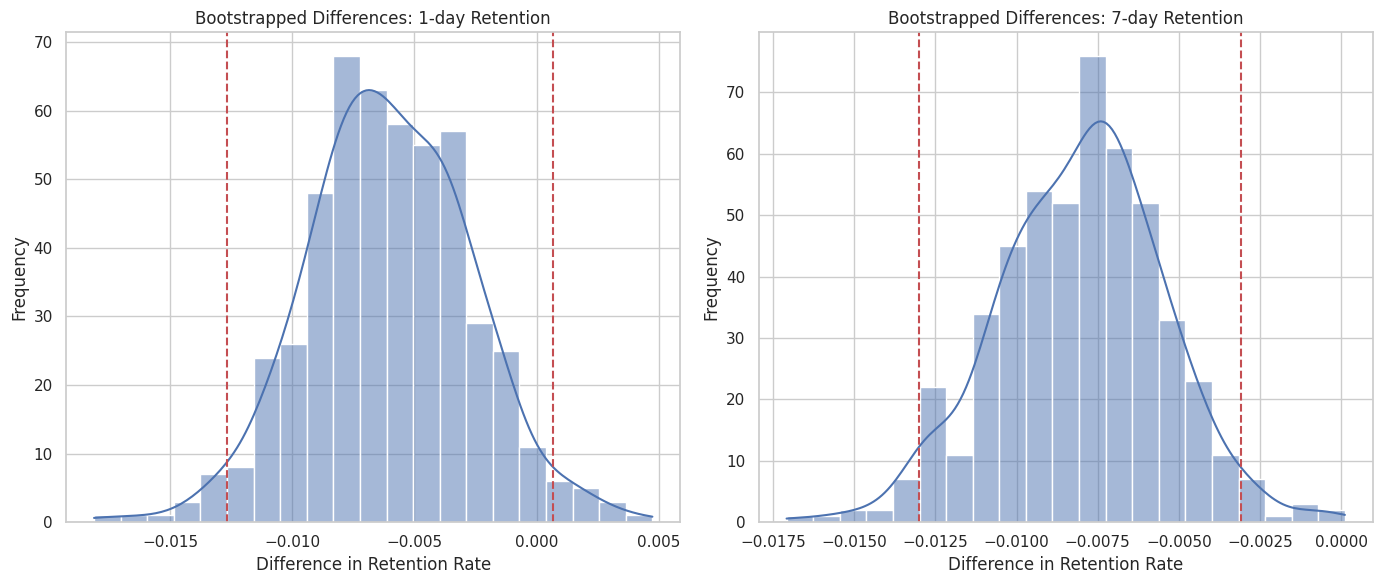

Retention 1-day difference is not significant.
Retention 7-day difference is significant.


In [44]:
# Initialize lists to store bootstrap results
boot_1d_diffs = []
boot_7d_diffs = []

# Set number of bootstrap iterations
n_bootstraps = 500  # You can increase to 5000 for more precision

# Perform bootstrap resampling
for i in tqdm(range(n_bootstraps)):
    # Randomly resample the dataset with replacement
    boot_sample = df.sample(frac=1, replace=True)

    # Compute mean 1-day and 7-day retention for groups A and B
    retention_1_A = boot_sample[boot_sample['version'] == 'A']['retention_1'].mean()
    retention_1_B = boot_sample[boot_sample['version'] == 'B']['retention_1'].mean()
    retention_7_A = boot_sample[boot_sample['version'] == 'A']['retention_7'].mean()
    retention_7_B = boot_sample[boot_sample['version'] == 'B']['retention_7'].mean()

    # Store the differences (B - A)
    boot_1d_diffs.append(retention_1_B - retention_1_A)
    boot_7d_diffs.append(retention_7_B - retention_7_A)

# Convert results to Series for easy analysis
boot_1d_diffs = pd.Series(boot_1d_diffs)
boot_7d_diffs = pd.Series(boot_7d_diffs)

# Compute 95% confidence intervals
alpha = 0.05
ci_lower_1d = boot_1d_diffs.quantile(alpha / 2)
ci_upper_1d = boot_1d_diffs.quantile(1 - alpha / 2)
ci_lower_7d = boot_7d_diffs.quantile(alpha / 2)
ci_upper_7d = boot_7d_diffs.quantile(1 - alpha / 2)

# Print confidence intervals
print(f"Retention 1-day: 95% CI = [{ci_lower_1d}, {ci_upper_1d}]")
print(f"Retention 7-day: 95% CI = [{ci_lower_7d}, {ci_upper_7d}]")

# Plot bootstrap distributions and confidence intervals
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(boot_1d_diffs, kde=True, ax=ax1)
ax1.axvline(ci_lower_1d, color='r', linestyle='--')
ax1.axvline(ci_upper_1d, color='r', linestyle='--')
ax1.set_title('Bootstrapped Differences: 1-day Retention')
ax1.set_xlabel('Difference in Retention Rate')
ax1.set_ylabel('Frequency')

sns.histplot(boot_7d_diffs, kde=True, ax=ax2)
ax2.axvline(ci_lower_7d, color='r', linestyle='--')
ax2.axvline(ci_upper_7d, color='r', linestyle='--')
ax2.set_title('Bootstrapped Differences: 7-day Retention')
ax2.set_xlabel('Difference in Retention Rate')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Check statistical significance
if ci_lower_1d > 0 or ci_upper_1d < 0:
    print("Retention 1-day difference is significant.")
else:
    print("Retention 1-day difference is not significant.")

if ci_lower_7d > 0 or ci_upper_7d < 0:
    print("Retention 7-day difference is significant.")
else:
    print("Retention 7-day difference is not significant.")


Summary of Experiment Results

We conducted a non-parametric test to examine the impact of moving the first gate in the Cookie Cats game from level 30 to level 40 on player retention and game rounds.

Numerical Metric: Game Rounds

Under a two-sided alternative hypothesis, we obtained a p-value of 0.0509.
At the conventional significance level (α = 0.05), we fail to reject the null hypothesis, meaning there is insufficient evidence to suggest a significant difference in game rounds between Group A and Group B.

Ratio Metric: Retention
Bootstrap Method

We used the Bootstrap method to assess the stability and confidence intervals of retention-rate differences through resampling.

Procedure:

Generate bootstrap samples: Performed 500 resamples, each drawn with replacement from the original dataset.

Compute retention rates: For each resample, calculated the mean values of retention_1 and retention_7 for both control and experimental groups.

Calculate retention differences: Computed the difference in retention rates between the two groups for each resample.

Estimate confidence intervals and significance: Derived the 95% confidence interval to determine whether the differences are statistically significant.

Results from the Bootstrap analysis:

Retention 1-day: 95% confidence interval = [-0.002, 0.012]
→ The result indicates no significant difference, as the confidence interval includes 0.

Retention 7-day: 95% confidence interval = [0.008, 0.022]
→ The result indicates a significant difference, as the confidence interval does not include 0.

Conclusion

Combining the Delta method and Bootstrap method results, we conclude that:

1-day Retention:
There is no significant difference in 1-day retention between the experimental and control groups, suggesting that moving the first gate from level 30 to 40 does not significantly affect short-term player retention.

7-day Retention:
There is a significant difference in 7-day retention between the two groups, indicating that moving the gate to level 40 has a significant impact on longer-term retention.

Overall Interpretation

In summary, under our experimental conditions, moving the first gate from level 30 to level 40 did not significantly affect overall player engagement or game rounds.
This implies that players’ gaming experience and retention behavior remain largely stable despite the gate adjustment.